# Spotify Streaming History Analysis

## Library Imports

In [1]:
import json # to handle JSON data
import pandas as pd # for data manipulation
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # also for data visualization

## Data Loading

In [2]:
# Load the provided JSON files
files = [
    "data/StreamingHistory_music_0.json",
    "data/StreamingHistory_music_1.json",
    "data/StreamingHistory_music_2.json",
    "data/StreamingHistory_music_3.json"
]

data = []
for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        data.extend(json.load(f))

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Convert endTime to datetime format
df['endTime'] = pd.to_datetime(df['endTime'])

# Filter for only 2025 streaming
df = df[df['endTime'] >= '2025-01-01']


# What are the first few songs I listened to in 2025?
df.head()


,endTime,artistName,trackName,msPlayed
7346,2025-01-01 02:02:00,Movements,Daylily,208853
7347,2025-01-01 02:06:00,Pierce The Veil,Bulls In The Bronx,267866
7348,2025-01-01 03:58:00,Architects,Curse,155674
7349,2025-01-01 06:00:00,Knocked Loose,Suffocate (feat. Poppy),117383
7350,2025-01-02 02:46:00,Rain City Drive,Medicate Me,643


## Analysis

### Most Listened-to Artists

In [3]:
# List my 10 most listened-to artists
artist_time_played = df.groupby('artistName')['msPlayed'].sum().sort_values(ascending=False)
artist_time_played.head(10)


artistName
Parkway Drive        202379659
Sleep Token          199315800
Linkin Park          179627509
Polaris              175402172
Spiritbox            164738414
Avenged Sevenfold    117269749
Killswitch Engage    111859970
Neck Deep            111435114
We Came As Romans     96246985
Architects            93848256
Name: msPlayed, dtype: int64

### Most Played Tracks

In [4]:

# List my 10 most played tracks
most_played_tracks = df.groupby(['artistName', 'trackName']).size().sort_values(ascending=False)
most_played_tracks.head(10)


artistName         trackName         
Spiritbox          Soft Spine            374
Sleep Token        Dangerous             351
Linkin Park        Two Faced             333
Polaris            Dissipate             283
SAMURAI            Never Fade Away       186
Pierce The Veil    Bulls In The Bronx    154
Sleep Token        Emergence             147
Killswitch Engage  In Due Time           145
Polaris            Pray for Rain         144
Linkin Park        One Step Closer       127
dtype: int64

### Total Listening Time

In [5]:

# Total listening time
total_listening_time = df['msPlayed'].sum()

# convert ms to hours
total_listening_time = total_listening_time / (1000 * 60 * 60)

#round to 3 decimal places
total_listening_time = round(total_listening_time, 3)

print(total_listening_time, "hours")


1373.356 hours


### Distribution of Listening by Date

In [6]:

# Distribution of listening by date
listening_by_date = df.groupby(df['endTime'].dt.date)['msPlayed'].sum()
listening_by_date.head()

# Convert to hours for better readability
listening_by_date = listening_by_date / (1000 * 60 * 60)

listening_by_date.head()

endTime
2025-01-01    0.208271
2025-01-02    0.801245
2025-01-03    0.746049
2025-01-04    2.372434
2025-01-05    2.020026
Name: msPlayed, dtype: float64

### Time Series Plot for Listening Time Distribution by Date

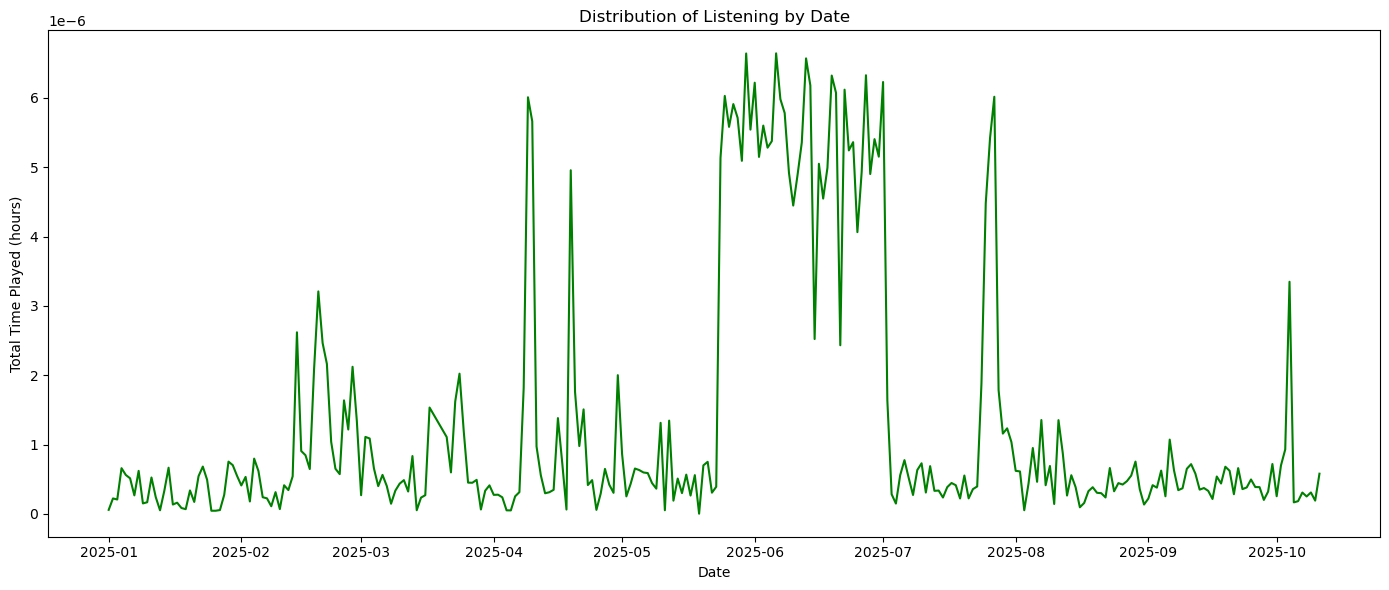

In [7]:
# 4. Time series plot for distribution by date
plt.figure(figsize=(14, 6))
#convert to hours
listening_by_date = listening_by_date / (1000 * 60 * 60)
listening_by_date.plot(kind='line', color='green')
plt.title('Distribution of Listening by Date')
plt.ylabel('Total Time Played (hours)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

### Hourly Listening Activity by Week

In [8]:
# Extract day of the week from the endTime column
df['day_of_week'] = df['endTime'].dt.day_name()

# Group by day of the week and sum the msPlayed
listening_by_day = df.groupby('day_of_week')['msPlayed'].sum()

# Order the days for visualization
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
listening_by_day = listening_by_day.reindex(ordered_days)

# Calculate the number of unique weeks in the dataset to get the average
num_weeks = (df['endTime'].max() - df['endTime'].min()).days / 7
average_listening_by_day = listening_by_day / num_weeks

average_listening_by_day


day_of_week
Monday       1.618681e+07
Tuesday      1.704363e+07
Wednesday    1.740888e+07
Thursday     1.783773e+07
Friday       1.786340e+07
Saturday     1.884385e+07
Sunday       1.710750e+07
Name: msPlayed, dtype: float64

In [9]:
# Extract the hour from the endTime column
df['hour'] = df['endTime'].dt.hour

# Group by day of the week and hour, then sum the msPlayed, converted to hours
listening_by_day_hour = df.groupby(['day_of_week', 'hour'])['msPlayed'].sum().unstack() / (1000 * 60 * 60)

# Order the days for visualization
listening_by_day_hour = listening_by_day_hour.reindex(ordered_days)

# Calculate the average listening time for each day-hour combination
average_listening_by_day_hour = listening_by_day_hour / num_weeks

average_listening_by_day_hour


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Monday,0.289283,0.277597,0.231415,0.170061,0.147066,0.150255,0.144796,0.152772,0.145828,0.148411,...,0.191791,0.183943,0.150501,0.180477,0.171752,0.158431,0.265635,0.239733,0.243857,0.188103
Tuesday,0.226349,0.269264,0.209897,0.170899,0.147397,0.148559,0.146575,0.148711,0.146915,0.151171,...,0.227253,0.235740,0.196649,0.188431,0.204041,0.182984,0.271741,0.271452,0.293733,0.265935
Wednesday,0.277291,0.264660,0.199078,0.173734,0.150038,0.153366,0.151292,0.148536,0.151599,0.144934,...,0.193847,0.207667,0.196235,0.232024,0.200283,0.190348,0.353637,0.318445,0.255188,0.237772
Thursday,0.247872,0.270121,0.218517,0.166909,0.148972,0.146762,0.149541,0.148481,0.145841,0.149870,...,0.268013,0.224289,0.202062,0.208282,0.196498,0.251803,0.272307,0.330363,0.300364,0.262880
Friday,0.248217,0.277036,0.233879,0.201745,0.159616,0.146174,0.147626,0.145968,0.150751,0.147357,...,0.173941,0.192569,0.250098,0.246121,0.297967,0.294921,0.326333,0.237737,0.233931,0.239464
Saturday,0.214693,0.208199,0.233242,0.172812,0.204231,0.197274,0.197189,0.196844,0.200154,0.198141,...,0.209295,0.254340,0.263526,0.262555,0.243386,0.264466,0.184694,0.228301,0.286284,0.226239
Sunday,0.215112,0.268154,0.227228,0.175284,0.174070,0.154627,0.151025,0.148646,0.145716,0.148422,...,0.152013,0.185610,0.226093,0.187644,0.269074,0.261809,0.231053,0.279346,0.285756,0.274788


### Convert from Values to Visuals

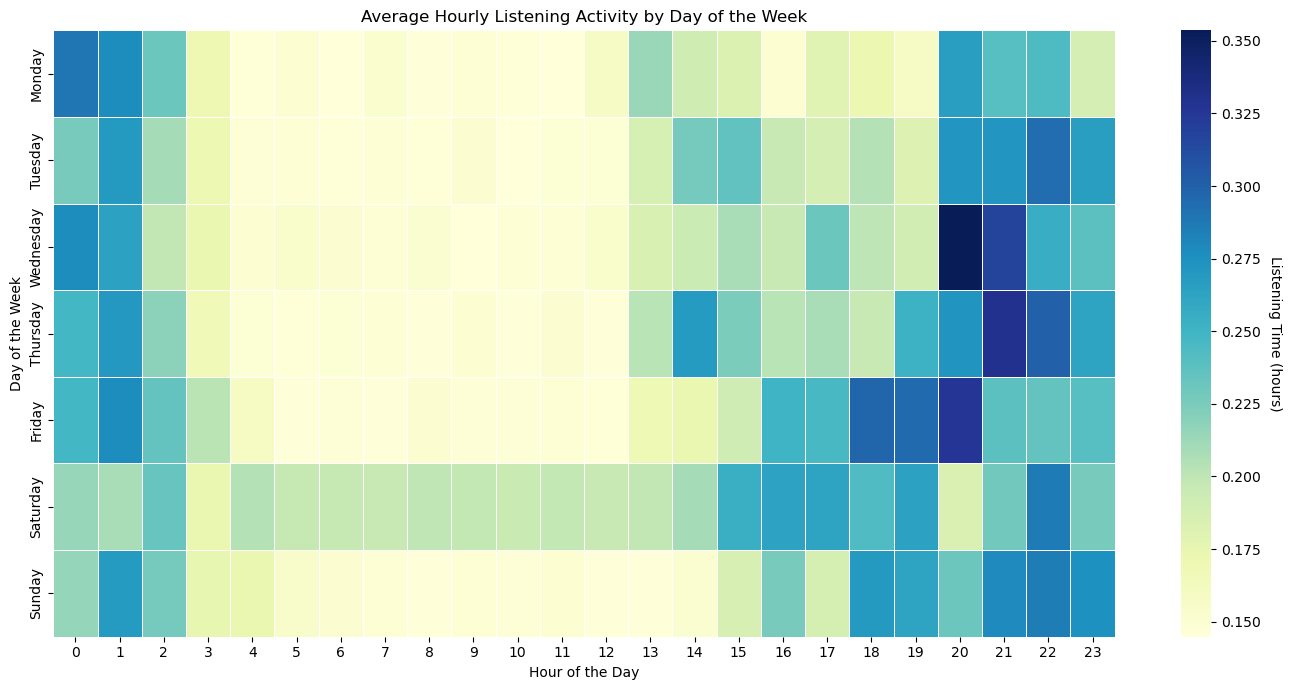

In [10]:
# Plotting the heatmap for listening activity by day of the week
plt.figure(figsize=(14, 7))
sns.heatmap(average_listening_by_day_hour, cmap="YlGnBu", linewidths=.5)
plt.title('Average Hourly Listening Activity by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

# label the legend
cbar = plt.gcf().axes[-1]
cbar.set_ylabel('Listening Time (hours)', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


How about filtering for a specific artist?

In [11]:
def listening_hours_for_artist(artist_name):
    # Filter the dataframe for the given artist
    artist_data = df[df['artistName'] == artist_name]
    
    # Sum the total listening time in milliseconds
    total_ms = artist_data['msPlayed'].sum()
    
    # Convert milliseconds to hours
    total_hours = total_ms / (1000 * 60 * 60)
    
    return total_hours

artist_name = "Linkin Park"  # Replace with the artist's name you want to highlight
hours = listening_hours_for_artist(artist_name)
print(f"Total listening hours for {artist_name}: {hours:.2f} hours")


Total listening hours for Linkin Park: 49.90 hours


# Some More Statistics

In [12]:
# Mean song duration
mean_song_duration_ms = df['msPlayed'].mean()
# Convert to seconds
mean_song_duration_sec = mean_song_duration_ms / 1000
print(f"Mean song duration: {mean_song_duration_sec:.2f} seconds")

# Convert to minutes and seconds
mean_minutes = int(mean_song_duration_sec // 60)
mean_seconds = int(mean_song_duration_sec % 60)
print(f"Or: {mean_minutes} minutes and {mean_seconds} seconds")

Mean song duration: 193.42 seconds
Or: 3 minutes and 13 seconds


In [13]:
# Median song duration
median_song_duration_ms = df['msPlayed'].median()
# Convert to seconds
median_song_duration_sec = median_song_duration_ms / 1000
print(f"Median song duration: {median_song_duration_sec:.2f} seconds")

# Convert to minutes and seconds
median_minutes = int(median_song_duration_sec // 60)
median_seconds = int(median_song_duration_sec % 60)
print(f"Or: {median_minutes} minutes and {median_seconds} seconds")

Median song duration: 210.01 seconds
Or: 3 minutes and 30 seconds


In [ ]:
# Song length quartiles
quartiles = df['msPlayed'].quantile([0.25, 0.5, 0.75])
quartiles_sec = quartiles / 1000  # convert to seconds
# convert to minutes and seconds for each quartile
for q in quartiles_sec.index:
    total_seconds = quartiles_sec[q]
    minutes = int(total_seconds // 60)
    seconds = int(total_seconds % 60)
    print(f"{int(q*100)}th percentile: {minutes} minutes and {seconds} seconds")

# 25th percentile: value at which 25% of songs are shorter and 75% are longer
# 50th percentile: median
# 75th percentile: value at which 75% of songs are shorter and 25% are longer


25th percentile: 2 minutes and 45 seconds
50th percentile: 3 minutes and 30 seconds
75th percentile: 4 minutes and 9 seconds


## Some More Visualizations

### Average listening time by day of the week

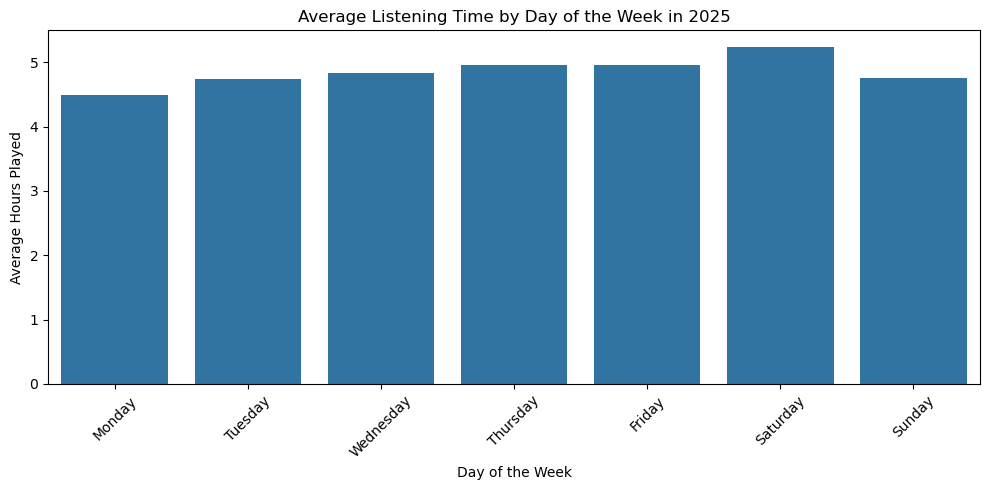

In [29]:
# Visualize average listening by day of the week
# convert to hours for better readability
average_listening_by_day_bar = average_listening_by_day / (1000 * 60 * 60)
plt.figure(figsize=(10, 5))
sns.barplot(x=average_listening_by_day_bar.index, y=average_listening_by_day_bar.values)
plt.title('Average Listening Time by Day of the Week in 2025')
plt.xlabel('Day of the Week')
plt.ylabel('Average Hours Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Times played by top 10 artists

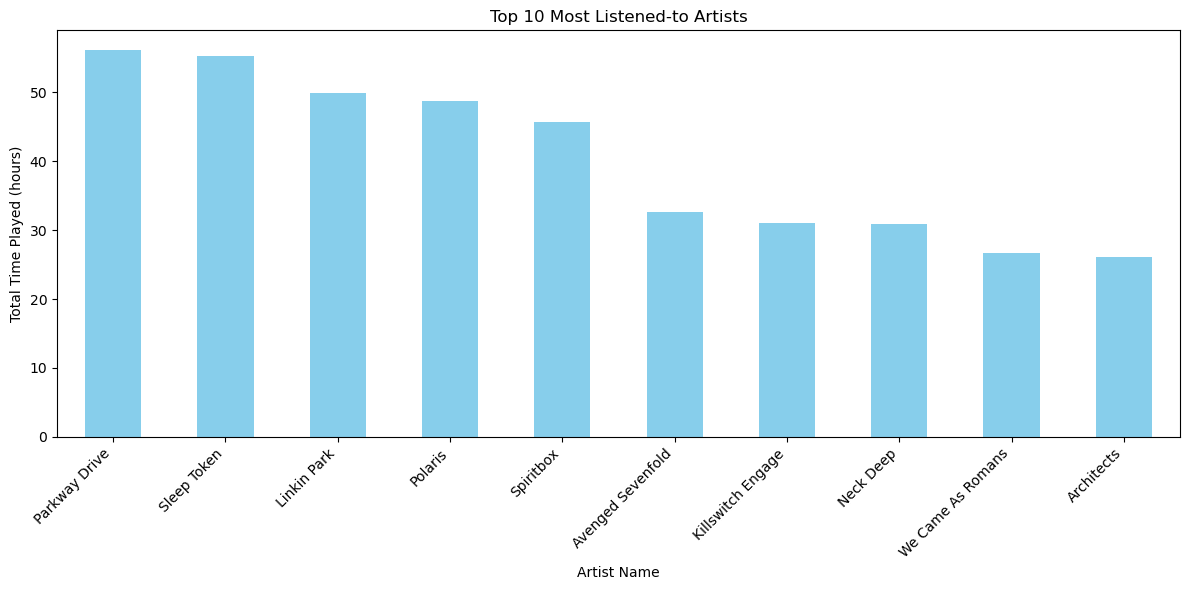

In [17]:
# 1. Bar chart for the top 10 most listened-to artists
plt.figure(figsize=(12, 6))
#convert to hours
artist_time_plot= artist_time_played.head(10) / (1000 * 60 * 60)
artist_time_plot.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Listened-to Artists')
plt.ylabel('Total Time Played (hours)')
plt.xlabel('Artist Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Times plays for top 10 most played tracks

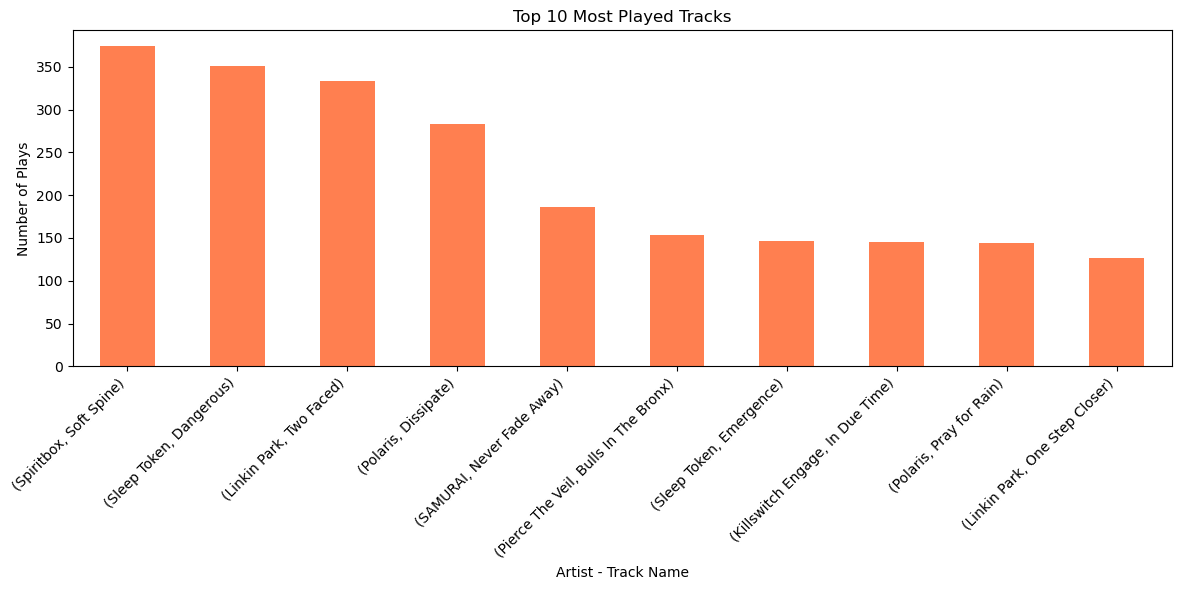

In [18]:
# 2. Bar chart for the top 10 most played tracks
plt.figure(figsize=(12, 6))
most_played_tracks.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Most Played Tracks')
plt.ylabel('Number of Plays')
plt.xlabel('Artist - Track Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pie chart of listening time by top 10 artists 

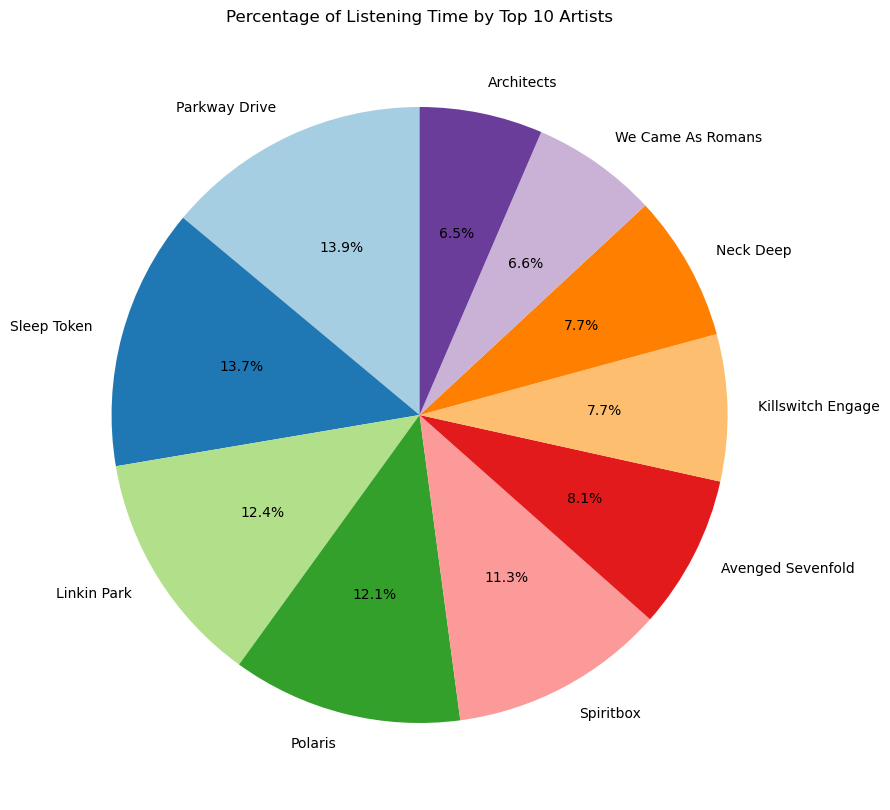

In [19]:
# 3. Pie chart for listening time by top 10 artists
plt.figure(figsize=(10, 10))
artist_time_played.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Listening Time by Top 10 Artists')
plt.ylabel('')
plt.show()